Unsupervised learning requires no labeled data!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def diff(a,b):
    difference = a-b
    return difference

In [3]:
def cost(X,R,M):
    cost=0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n,k]*(M[k]-X[n])
    return cost

In [4]:
def plot_k_means(X,K,max_iter=20,beta=0.3):
    N,D = X.shape
    M=np.zeros((K,D)) # k means are initialized to 0
    R=np.zeros((N,K))
    
    for k in range(K):
        M[k]=X[np.random.choice(N)]
        
    costs=np.zeros(max_iter)
    for i in range(max_iter):
        for k in range(K):
            for n in range(N):
                R[n,k]=np.exp(-beta*diff(M[k],X[n]))/np.sum(np.exp(-beta*diff(M[j],X[n])) for j in range(K))
        for k in range(K):
            M[k]=R[:,k].dot(X)/R[:,k].sum()
        costs[i] = cost(X,R,M)
        print(cost(X,R,M))
        if i>0:
            if np.abs(costs[i]-costs[i-1])<0.1:
                break
                
    plt.plot(costs)
    plt.title("Costs")
    plt.show()
    
    
    random_colors=np.random.random((K,3))
    colors=R.dot(random_colors)
    
    plt.scatter(X[:,0],X[:,1],c=colors)
    plt.show()

In [5]:
def main():
    #creating three gaussian clouds
    D=2
    s=4 #controls how far away the means are
    
    
    mu1=np.array([0,0])
    mu2=np.array([s,s])
    mu3=np.array([0,s])

    
    N=900 #number of samples (three for each class)
    X=np.zeros((N,D))
    X[:300,:]=np.random.randn(300,D)+mu1
    X[300:600,:]=np.random.randn(300,D)+mu2
    X[600:,:]=np.random.randn(300,D)+mu3
    
    plt.scatter(X[:,0], X[:,1])
    plt.show()
    
    K=3
    plot_k_means(X,K)
    
    K=5
    plot_k_means(X,K, max_iter=30)
     
    K=5
    plot_k_means(X,K, max_iter=30, beta=0.3)

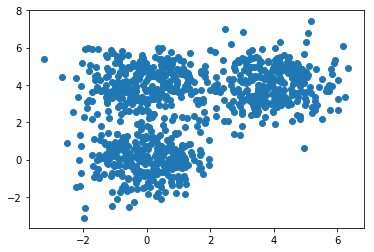

ValueError: setting an array element with a sequence.

In [6]:
if __name__=="__main__":
    main()